## Importing libraries and data

In [98]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
from IPython.display import display, HTML
from scipy.stats import skew  

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
# Optuna
import optuna
# Paellete

palette = ["#00203FFF", "#ADEFD1FF"]

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [45]:
df_tr = pd.read_csv('creditcard_2023.csv')

In [139]:
df_tr.drop('id',axis = 1 , inplace = True)

In [140]:
df_tr.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.565091,0.911068,0.328143,0.597037,0.191428,0.462018,0.021919,0.635760,0.186457,0.108955,0.586624,0.116075,0.381492,0.124850,0.308073,0.049729,0.316196,0.299337,0.681403,0.724297,0.701574,0.390449,0.486438,0.248563,0.486606,0.562599,0.084195,0.334369,0.747484,0
1,0.782703,0.913159,0.216170,0.554606,0.194228,0.455582,0.021412,0.635574,0.170651,0.105862,0.719723,0.179826,0.496800,0.128549,0.248338,0.061466,0.304750,0.285015,0.641447,0.721287,0.698503,0.350024,0.489894,0.204923,0.488866,0.615402,0.082847,0.335113,0.270170,0
2,0.565157,0.902238,0.283790,0.551131,0.190372,0.476540,0.022929,0.637820,0.145310,0.110474,0.670942,0.134424,0.514384,0.128039,0.376799,0.033499,0.355675,0.289104,0.467394,0.726801,0.705416,0.414277,0.503854,0.171033,0.460686,0.571403,0.082425,0.333564,0.102690,0
3,0.584043,0.910345,0.284848,0.473588,0.193703,0.470699,0.021915,0.639641,0.147624,0.107164,0.614308,0.138351,0.498240,0.125345,0.172021,0.044689,0.287747,0.499754,0.555136,0.719951,0.700250,0.377889,0.485160,0.127679,0.517692,0.556742,0.083515,0.336085,0.222361,0
4,0.574494,0.916671,0.272150,0.552320,0.190981,0.457739,0.022548,0.630815,0.199894,0.118424,0.561099,0.153004,0.562634,0.110395,0.218268,0.049912,0.300811,0.294789,0.708993,0.725742,0.701704,0.415594,0.486005,0.257170,0.467467,0.671330,0.085043,0.339272,0.593122,0


## Obtaining information about the data

In [65]:
# Creating a fuction to make an overview of data
def PrintColor(text: str, color=Fore.GREEN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_green_large(text):
    PrintColor(text, Fore.GREEN + Style.BRIGHT)

# Main Heading
def print_boxed_green_heading(text):
    length = len(text) + 4
    print(f"\n{Style.BRIGHT}{Fore.GREEN}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.GREEN}| {text} |{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.GREEN}{'='*length}{Style.RESET_ALL}")

# Function to Overview Data
def data_overview(tr_d):

    # Display head of the dataframe
    print_boxed_green_heading("The Head Of A Dataframe:")
    display(HTML(tr_d.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid green;">')))

    print('\n')

    # Shape of a dataframe
    print_boxed_green_heading("Shape Information:")
    PrintColor(f"The Shape Of Train Data is {tr_d.shape} || No of Rows is : {tr_d.shape[0]} and Columns is {tr_d.shape[1]}", Fore.GREEN)
    print('\n')

    # Info of Both Datasets
    print_boxed_green_heading("Dataset Information:")
    PrintColor(f"\nThe Info Of Train Dataset", Fore.GREEN)
    tr_d.info()

    # Describe Both
    print_boxed_green_heading("Numerical Summary:")
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.GREEN)
    display(tr_d.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'green')]}]))

    # Null Values in a dataframe
    print_boxed_green_heading("Null Values:")
    PrintColor("\nNull Values", Fore.GREEN)
    print(tr_d.isnull().sum())
    print('\n')

    # Duplicates Values in a dataframe
    print_boxed_green_heading("Duplicate Values:")
    PrintColor("\nDuplicates Values in Train", Fore.GREEN)
    print(tr_d.duplicated().sum())

In [66]:
data_overview(df_tr)


| The Head Of A Dataframe: |


id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0





| Shape Information: |
The Shape Of Train Data is (568630, 31) || No of Rows is : 568630 and Columns is 31



| Dataset Information: |

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 1

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
mean,284314.500000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,12041.957635,0.500000
std,164149.486121,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,6919.644449,0.500000
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,-3.163276,-5.954723,-2.020399,-5.955227,-2.107417,-3.861813,-2.214513,-2.484938,-2.421949,-7.804988,-78.147839,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.010000,0.000000
25%,142157.250000,-0.565286,-0.486678,-0.649299,-0.656020,-0.293496,-0.445871,-0.283533,-0.192257,-0.568745,-0.590101,-0.701449,-0.831133,-0.696667,-0.873206,-0.621249,-0.716265,-0.619491,-0.556046,-0.565308,-0.350240,-0.166441,-0.490489,-0.237629,-0.651580,-0.554148,-0.631895,-0.304961,-0.231878,6054.892500,0.000000
50%,284314.500000,-0.093638,-0.135894,0.000353,-0.073762,0.081088,0.078718,0.233366,-0.114524,0.092526,0.262614,-0.041050,0.162052,0.017608,0.230501,-0.039256,0.134026,0.271641,0.087294,-0.025979,-0.123378,-0.037431,-0.027329,-0.059689,0.015901,-0.008193,-0.011892,-0.172911,-0.013930,12030.150000,0.500000
75%,426471.750000,0.832658,0.343555,0.628538,0.707005,0.439737,0.497788,0.525955,0.047299,0.559262,0.592460,0.747773,0.744672,0.685605,0.751822,0.665406,0.655606,0.518224,0.544389,0.560116,0.248216,0.147979,0.463882,0.155715,0.700737,0.550015,0.672888,0.334023,0.409590,18036.330000,1.000000
max,568629.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,31.722709,2.513573,17.913556,7.187486,19.169544,14.532202,46.652906,6.994124,6.783716,3.831672,29.872812,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000



| Null Values: |

Null Values
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



| Duplicate Values: |

Duplicates Values in Train
0


## EDA Analysis and Data Visualization

In [109]:
# Creating a fuction to build a pie and a bar plots

def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    val_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(val_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=14)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=0)

    # Show the plots
    plt.tight_layout()
    plt.show()

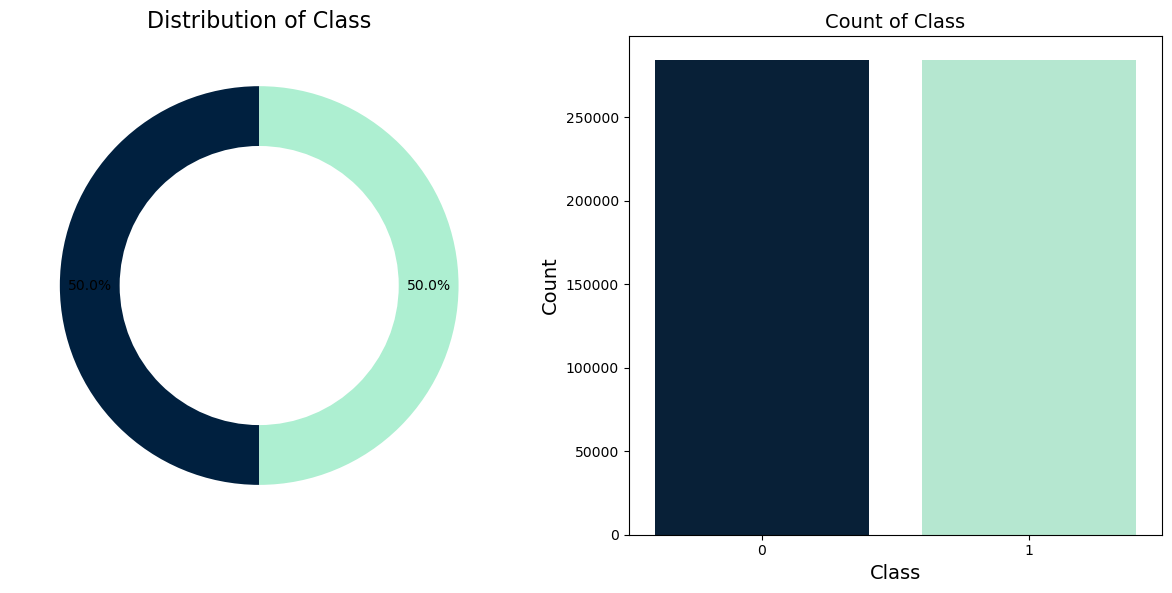

In [110]:
single_plot_distribution('Class',df_tr)

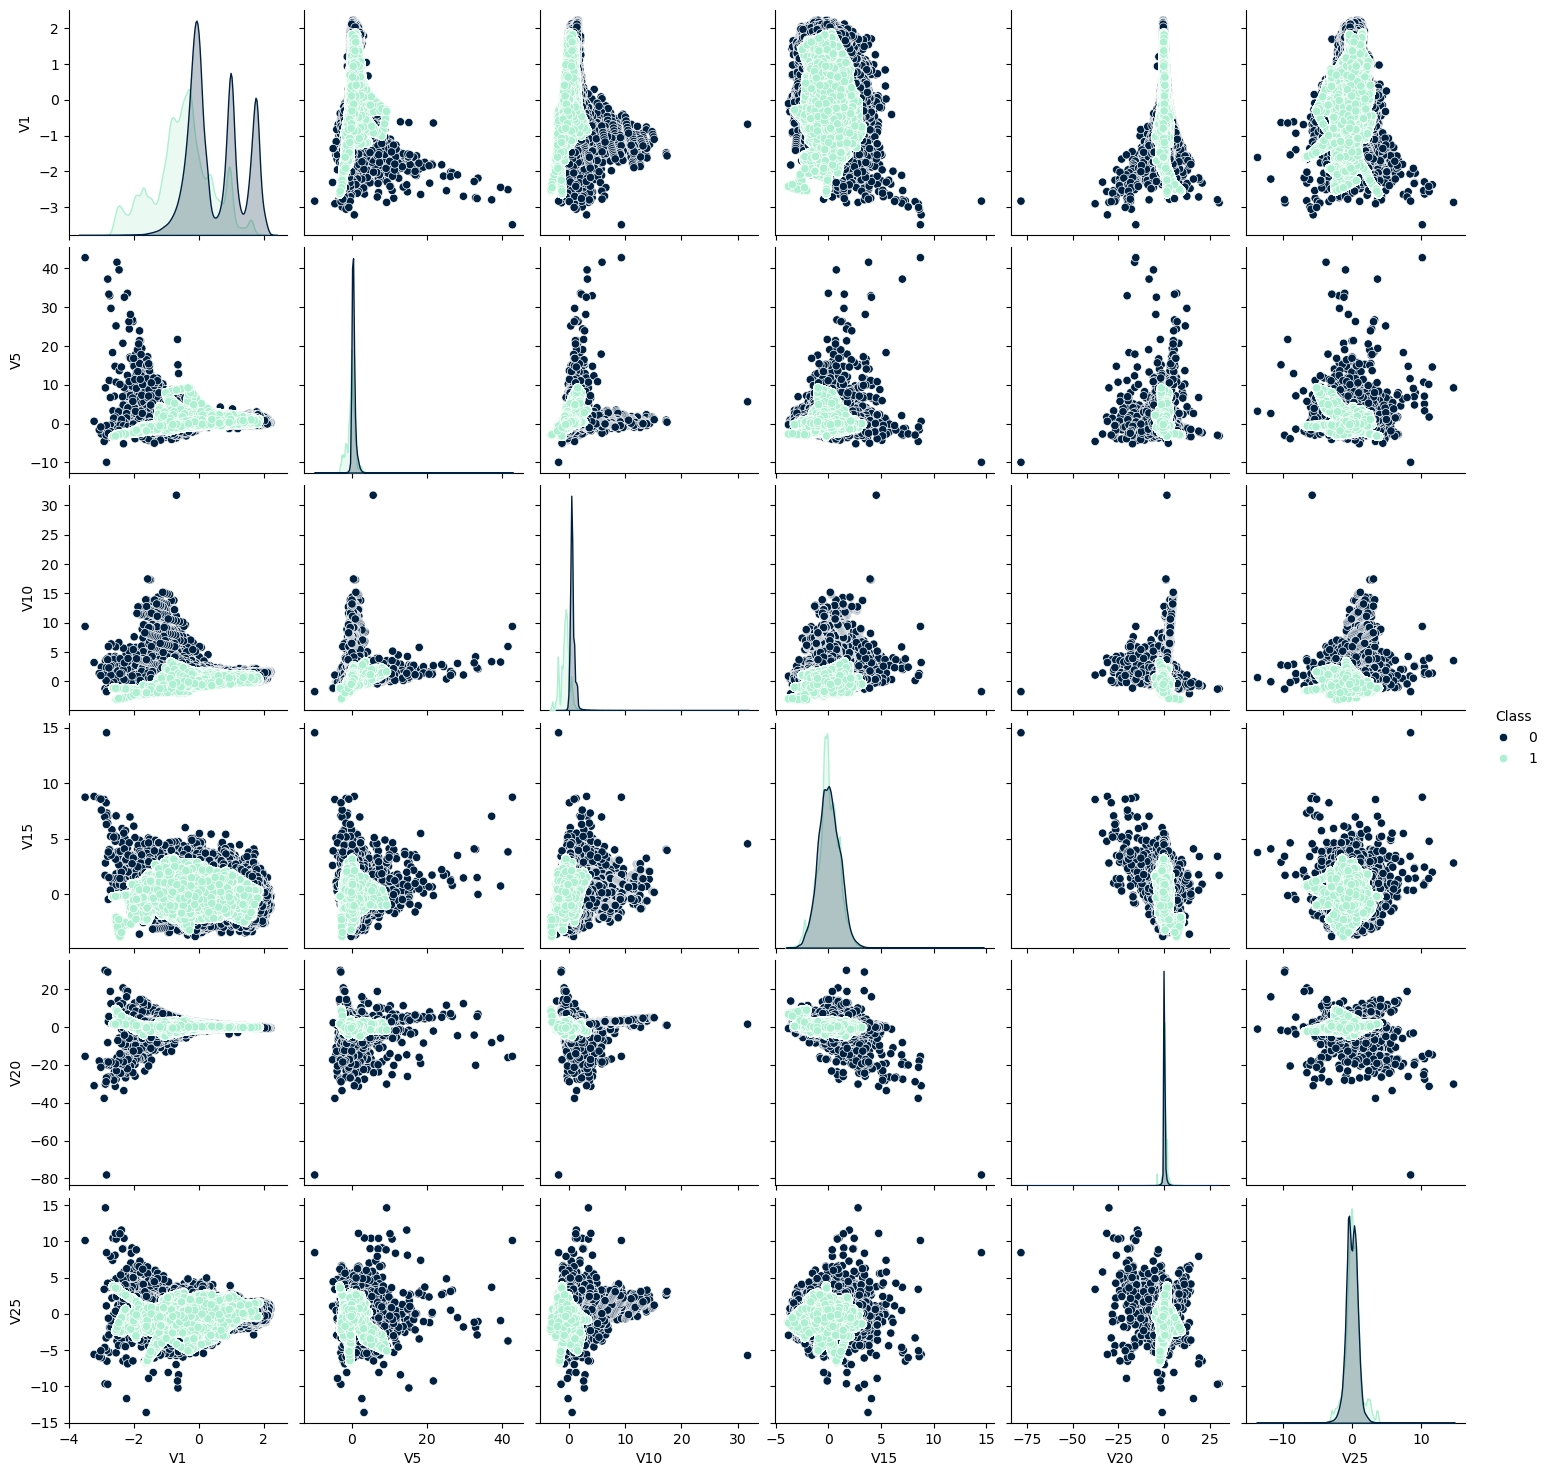

In [114]:
# Cols to Plot 
columns_to_plot =['V1', 'V5', 'V10', 'V15', 'V20', 'V25', 'Class']

# Data Columns
data_to_plot = df_tr[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = { 0 : palette[0], 1 : palette[1], 'other': 'gray'}  

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Class', palette=Q_colors)
plt.show()

## Outliers

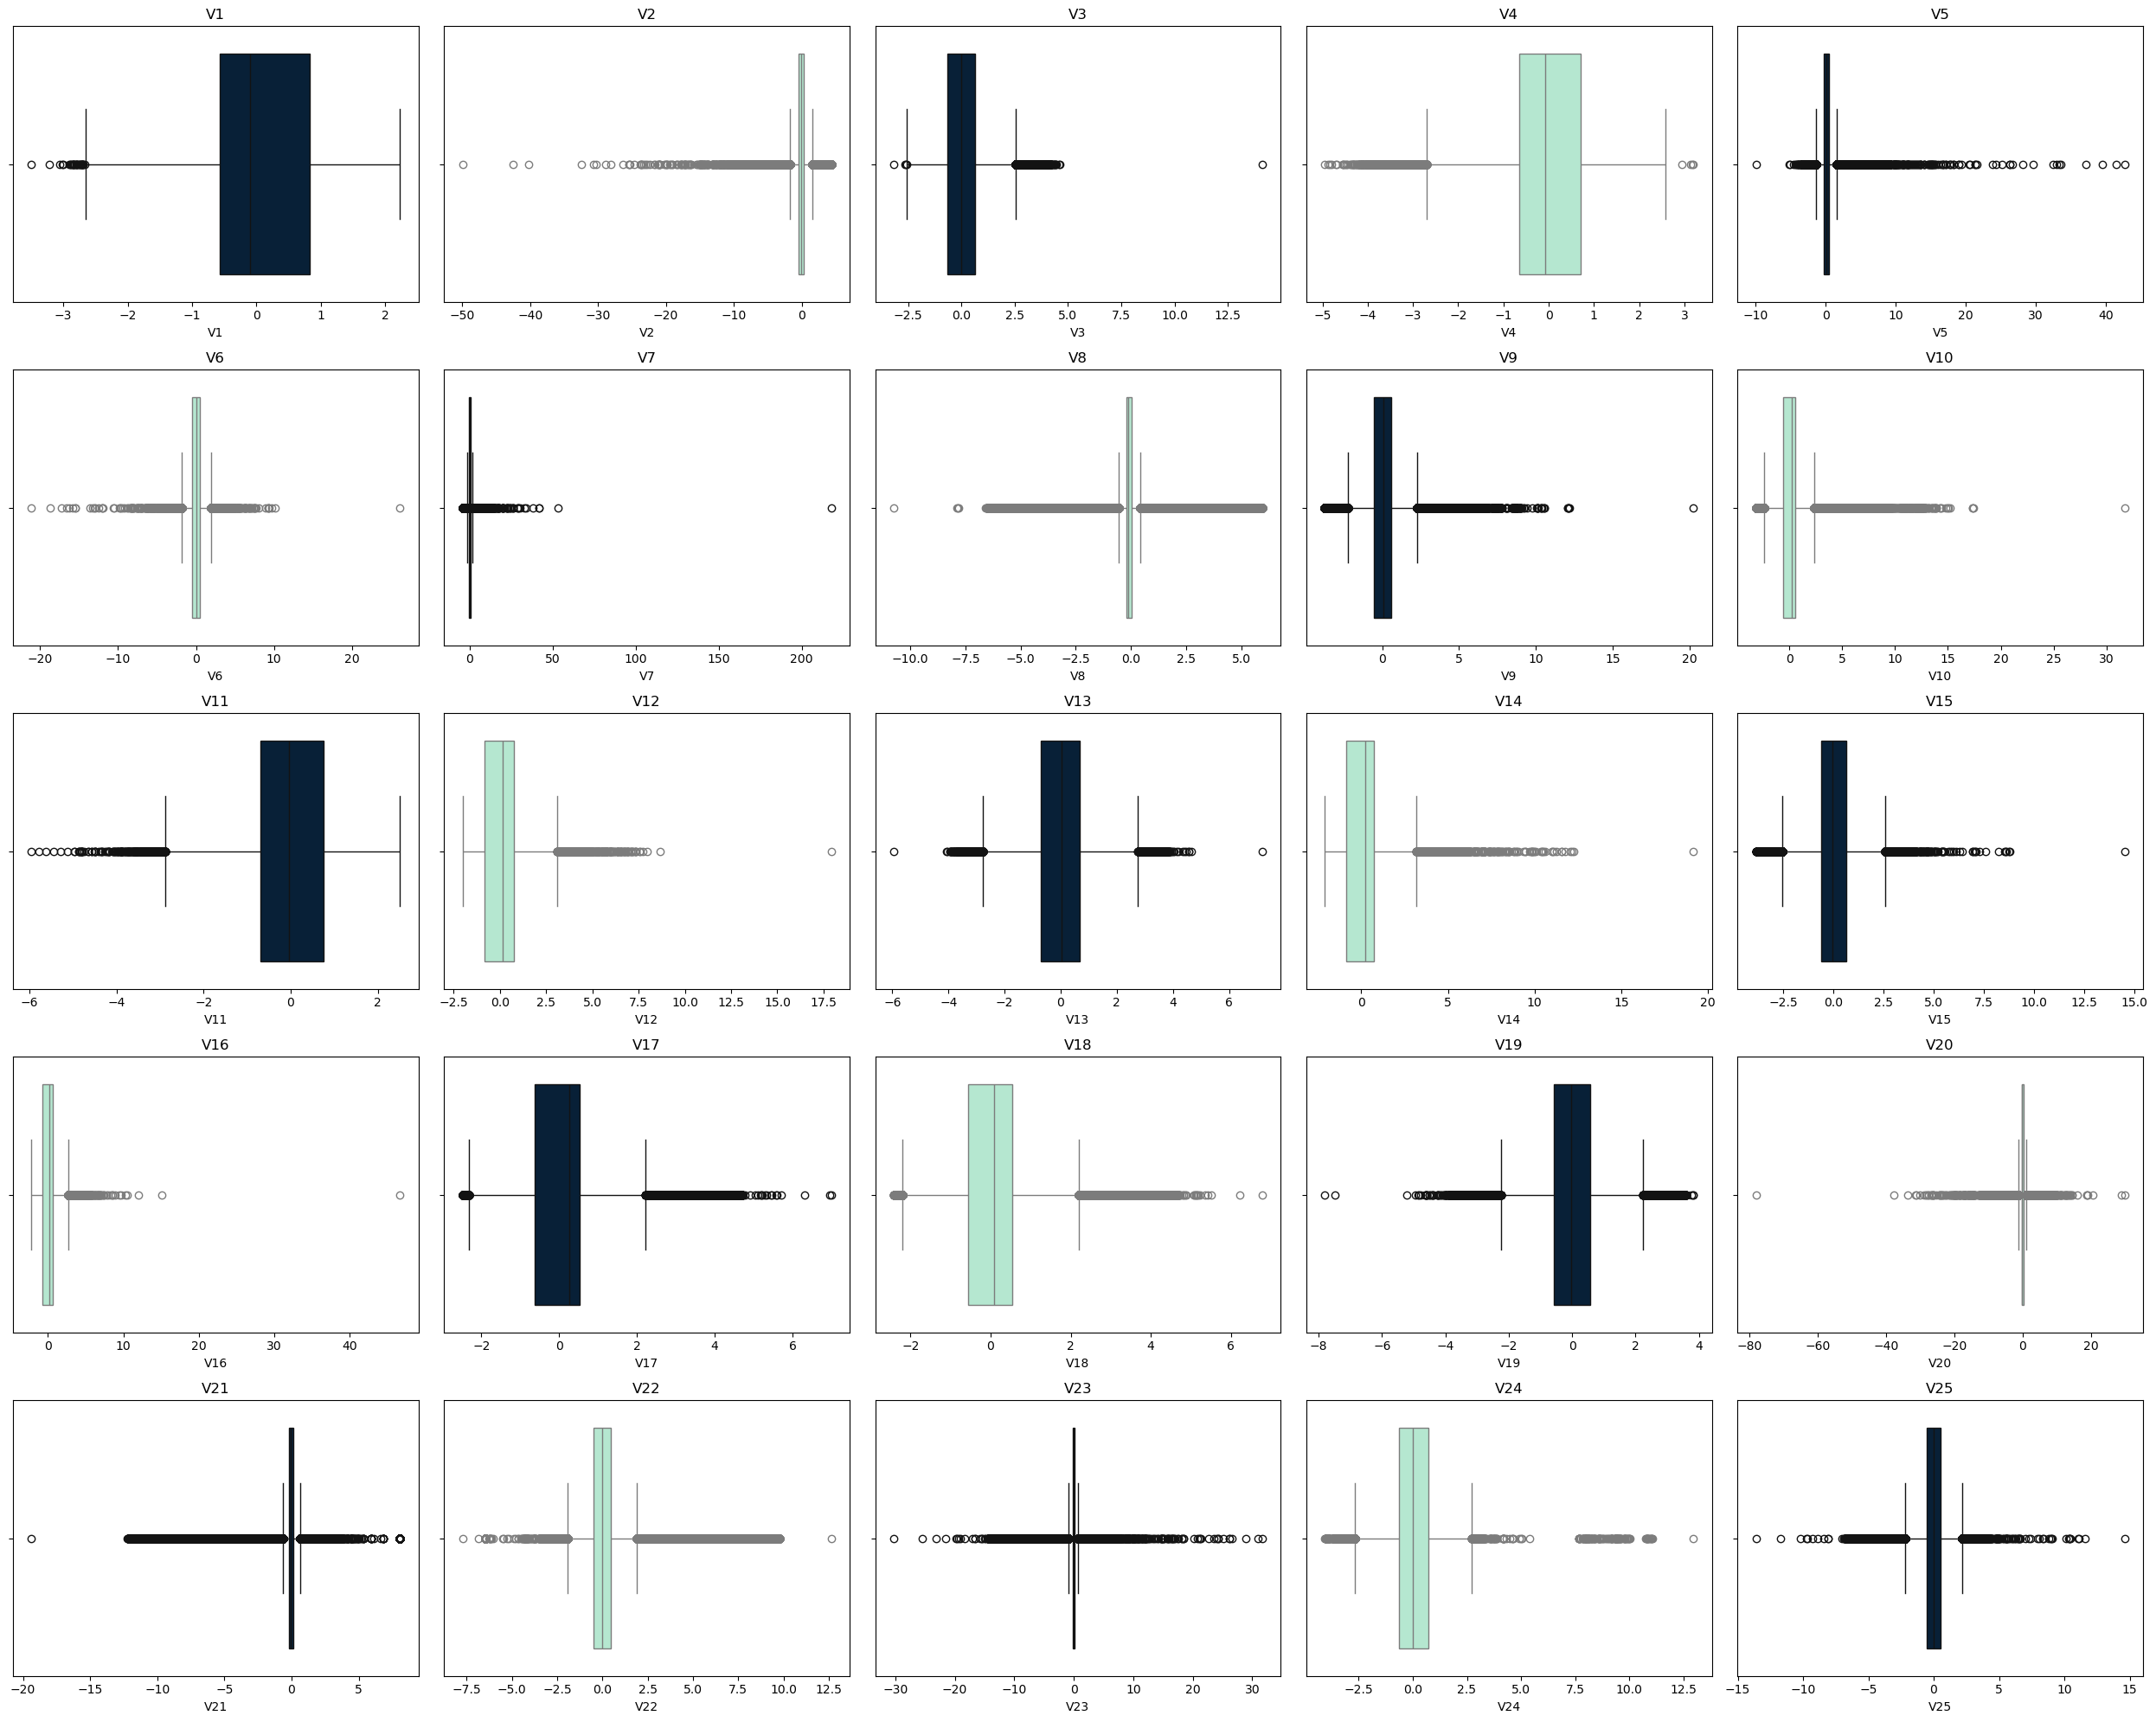

In [122]:
numeric_columns = [col for col in df_tr.columns if df_tr[col].dtype == 'float']

# Creating subplots
num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))
axes = axes.flatten() # Flattening to ease up the iteration

# Looping through each numerical column
for i, col in enumerate(numeric_columns[:num_rows * num_cols]):
    sns.boxplot(x=df_tr[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Feature distribution

In [124]:
# Function to Plot Numerical Distribution 
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Gender', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2 
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten() 
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):  
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        
        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'
        
        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])
    
    # Set Tight Layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

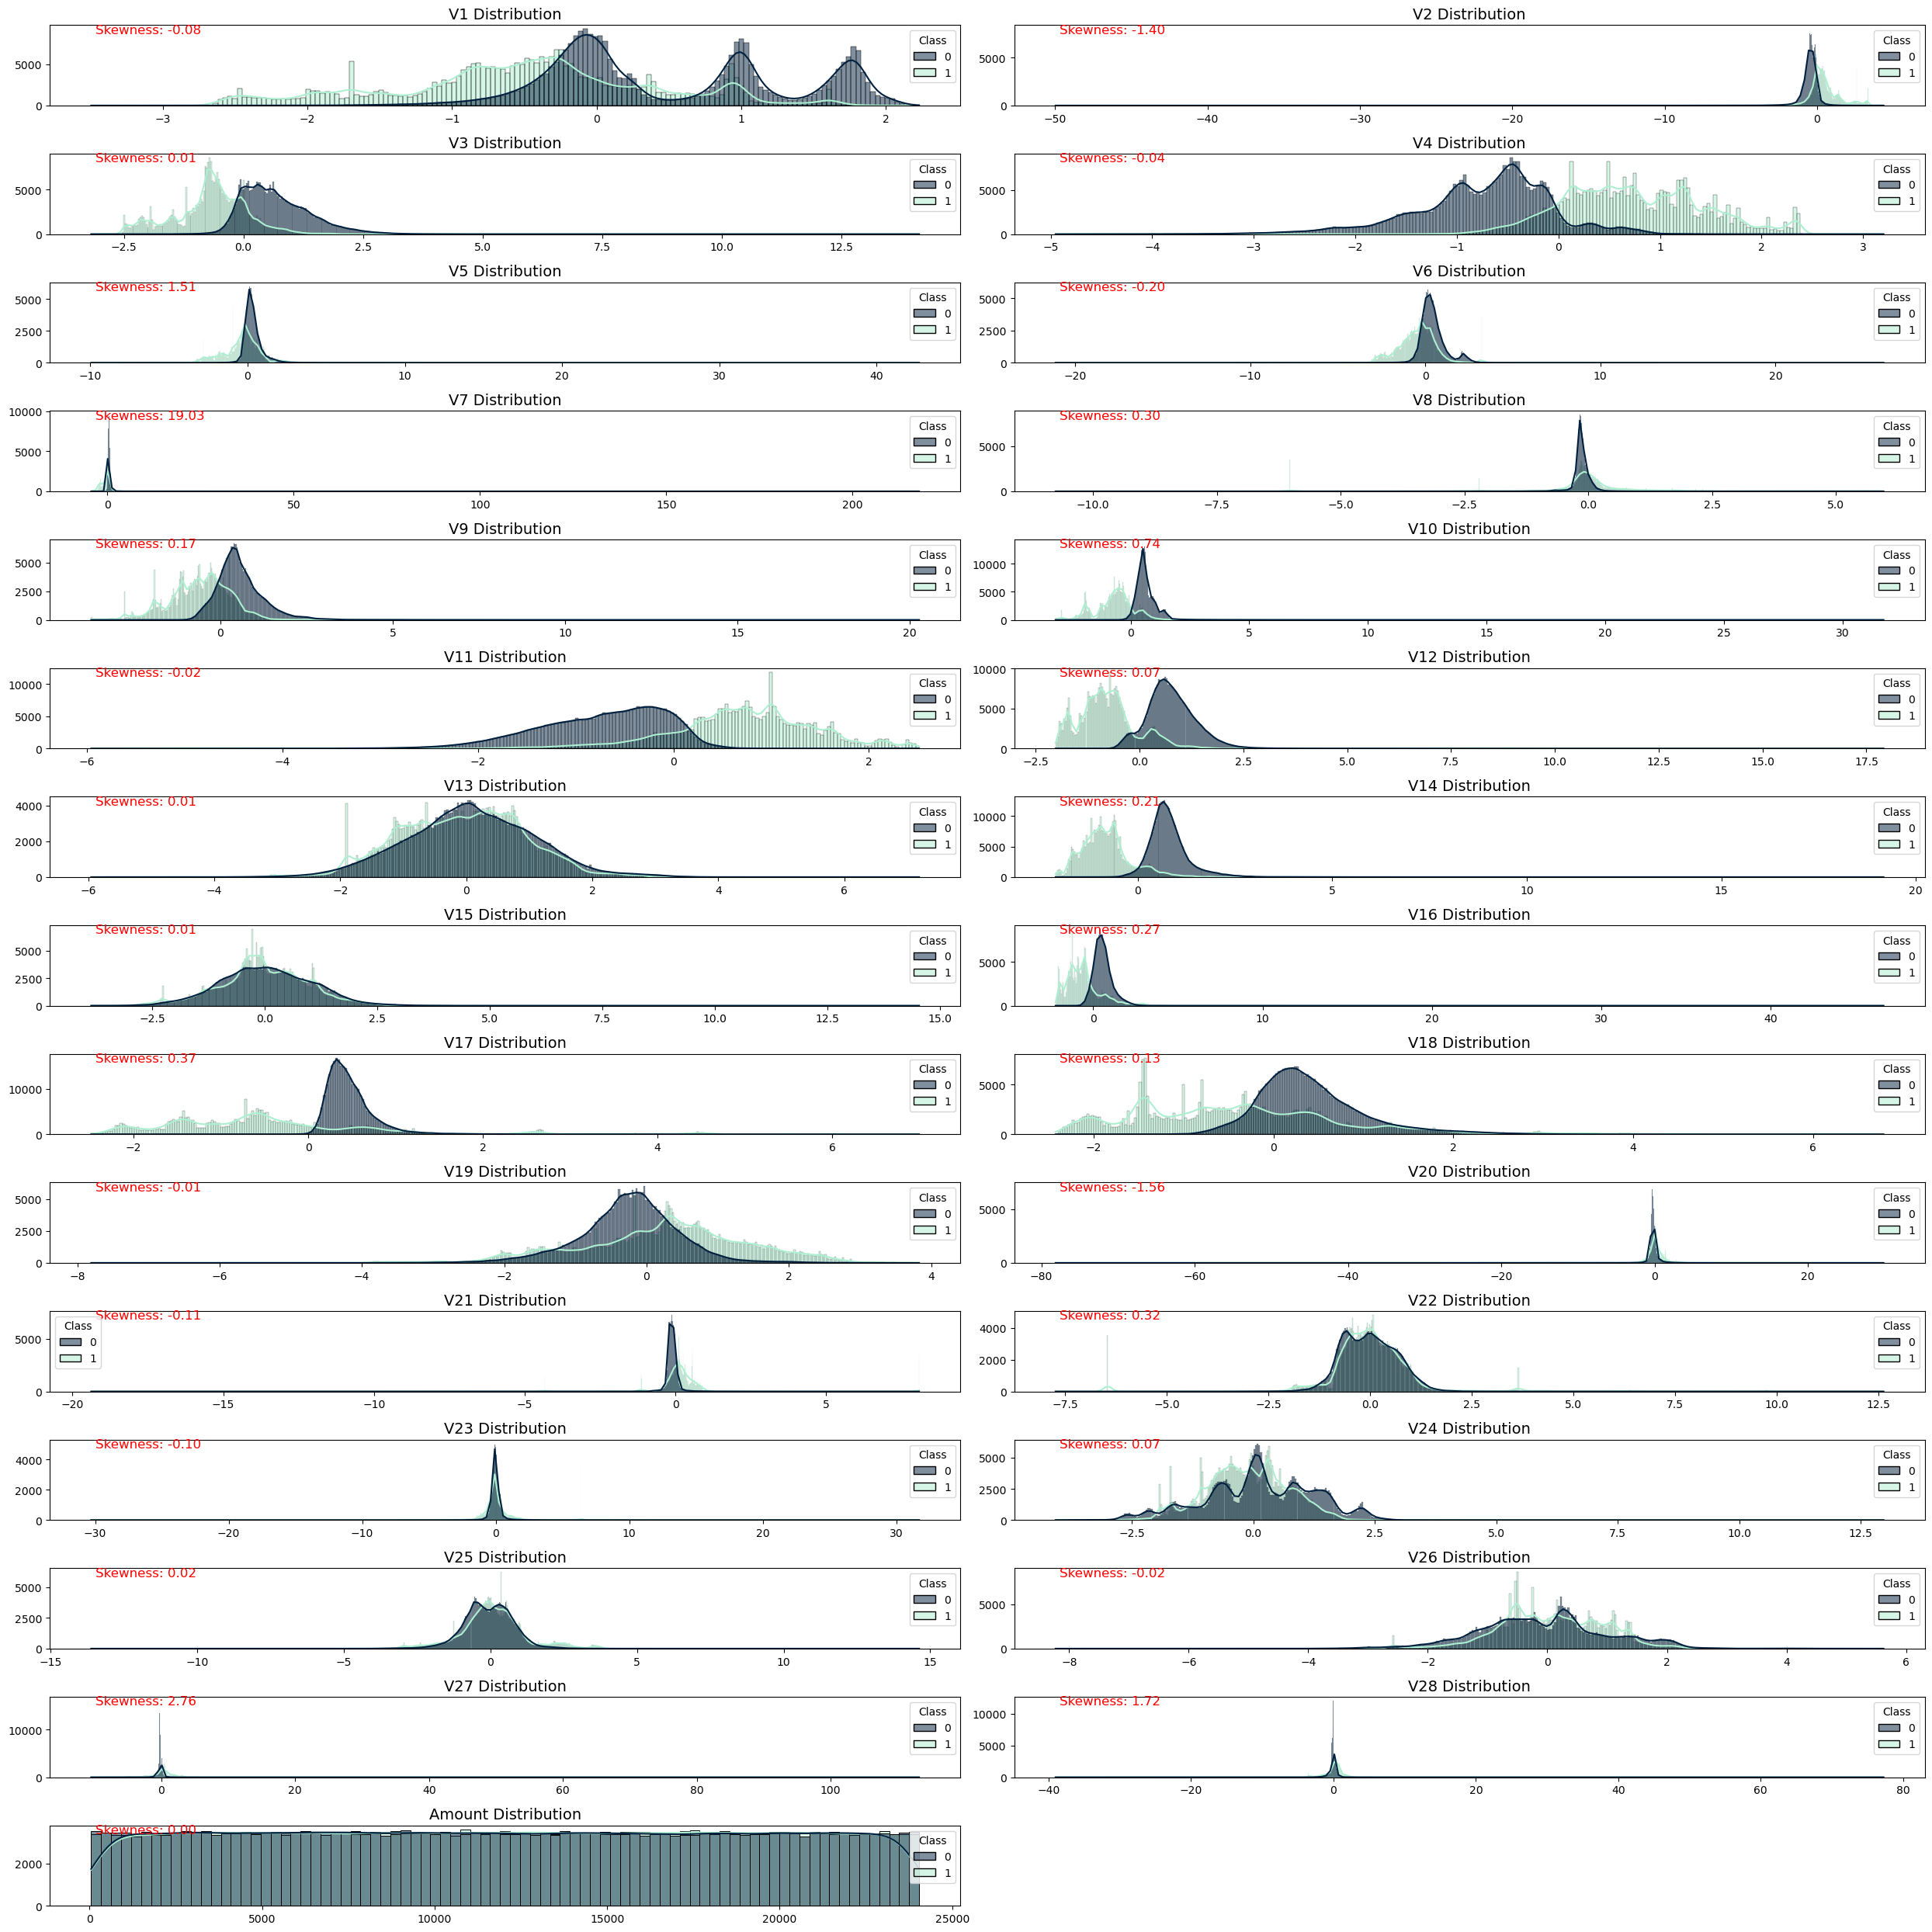

In [130]:
# Cols to Plot
cols_to_plot = [col for col in df_tr.columns if df_tr[col].dtype == 'float']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(df_tr, cols_to_plot, 'Class')

In [131]:
# Function to Scale Data
def apply_scaling(data, columns, scaler_type):
    # Checking the type of scaler and initializing the appropriate scaler object
    if scaler_type == 'S':
        scaler = StandardScaler()  
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')
    else:
        raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

    # Create a copy of the input data to avoid modifying the original data
    scaled_data = data.copy()

    # Loop through each column to be scaled
    for col in columns:
        # Apply the scaler to the current column and update the data with the scaled values
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])

    # Return the scaled data
    return scaled_data

In [132]:
# Specifing columns and scaler type
columns_to_scale =[col for col in df_tr.columns if df_tr[col].dtype == 'float']
scaler_type = 'M' 

# Apply scaling to training data
df_tr = apply_scaling(df_tr, columns_to_scale, scaler_type)
PrintColor('Data Scaling Done')

Data Scaling Done


## Correlation analysis

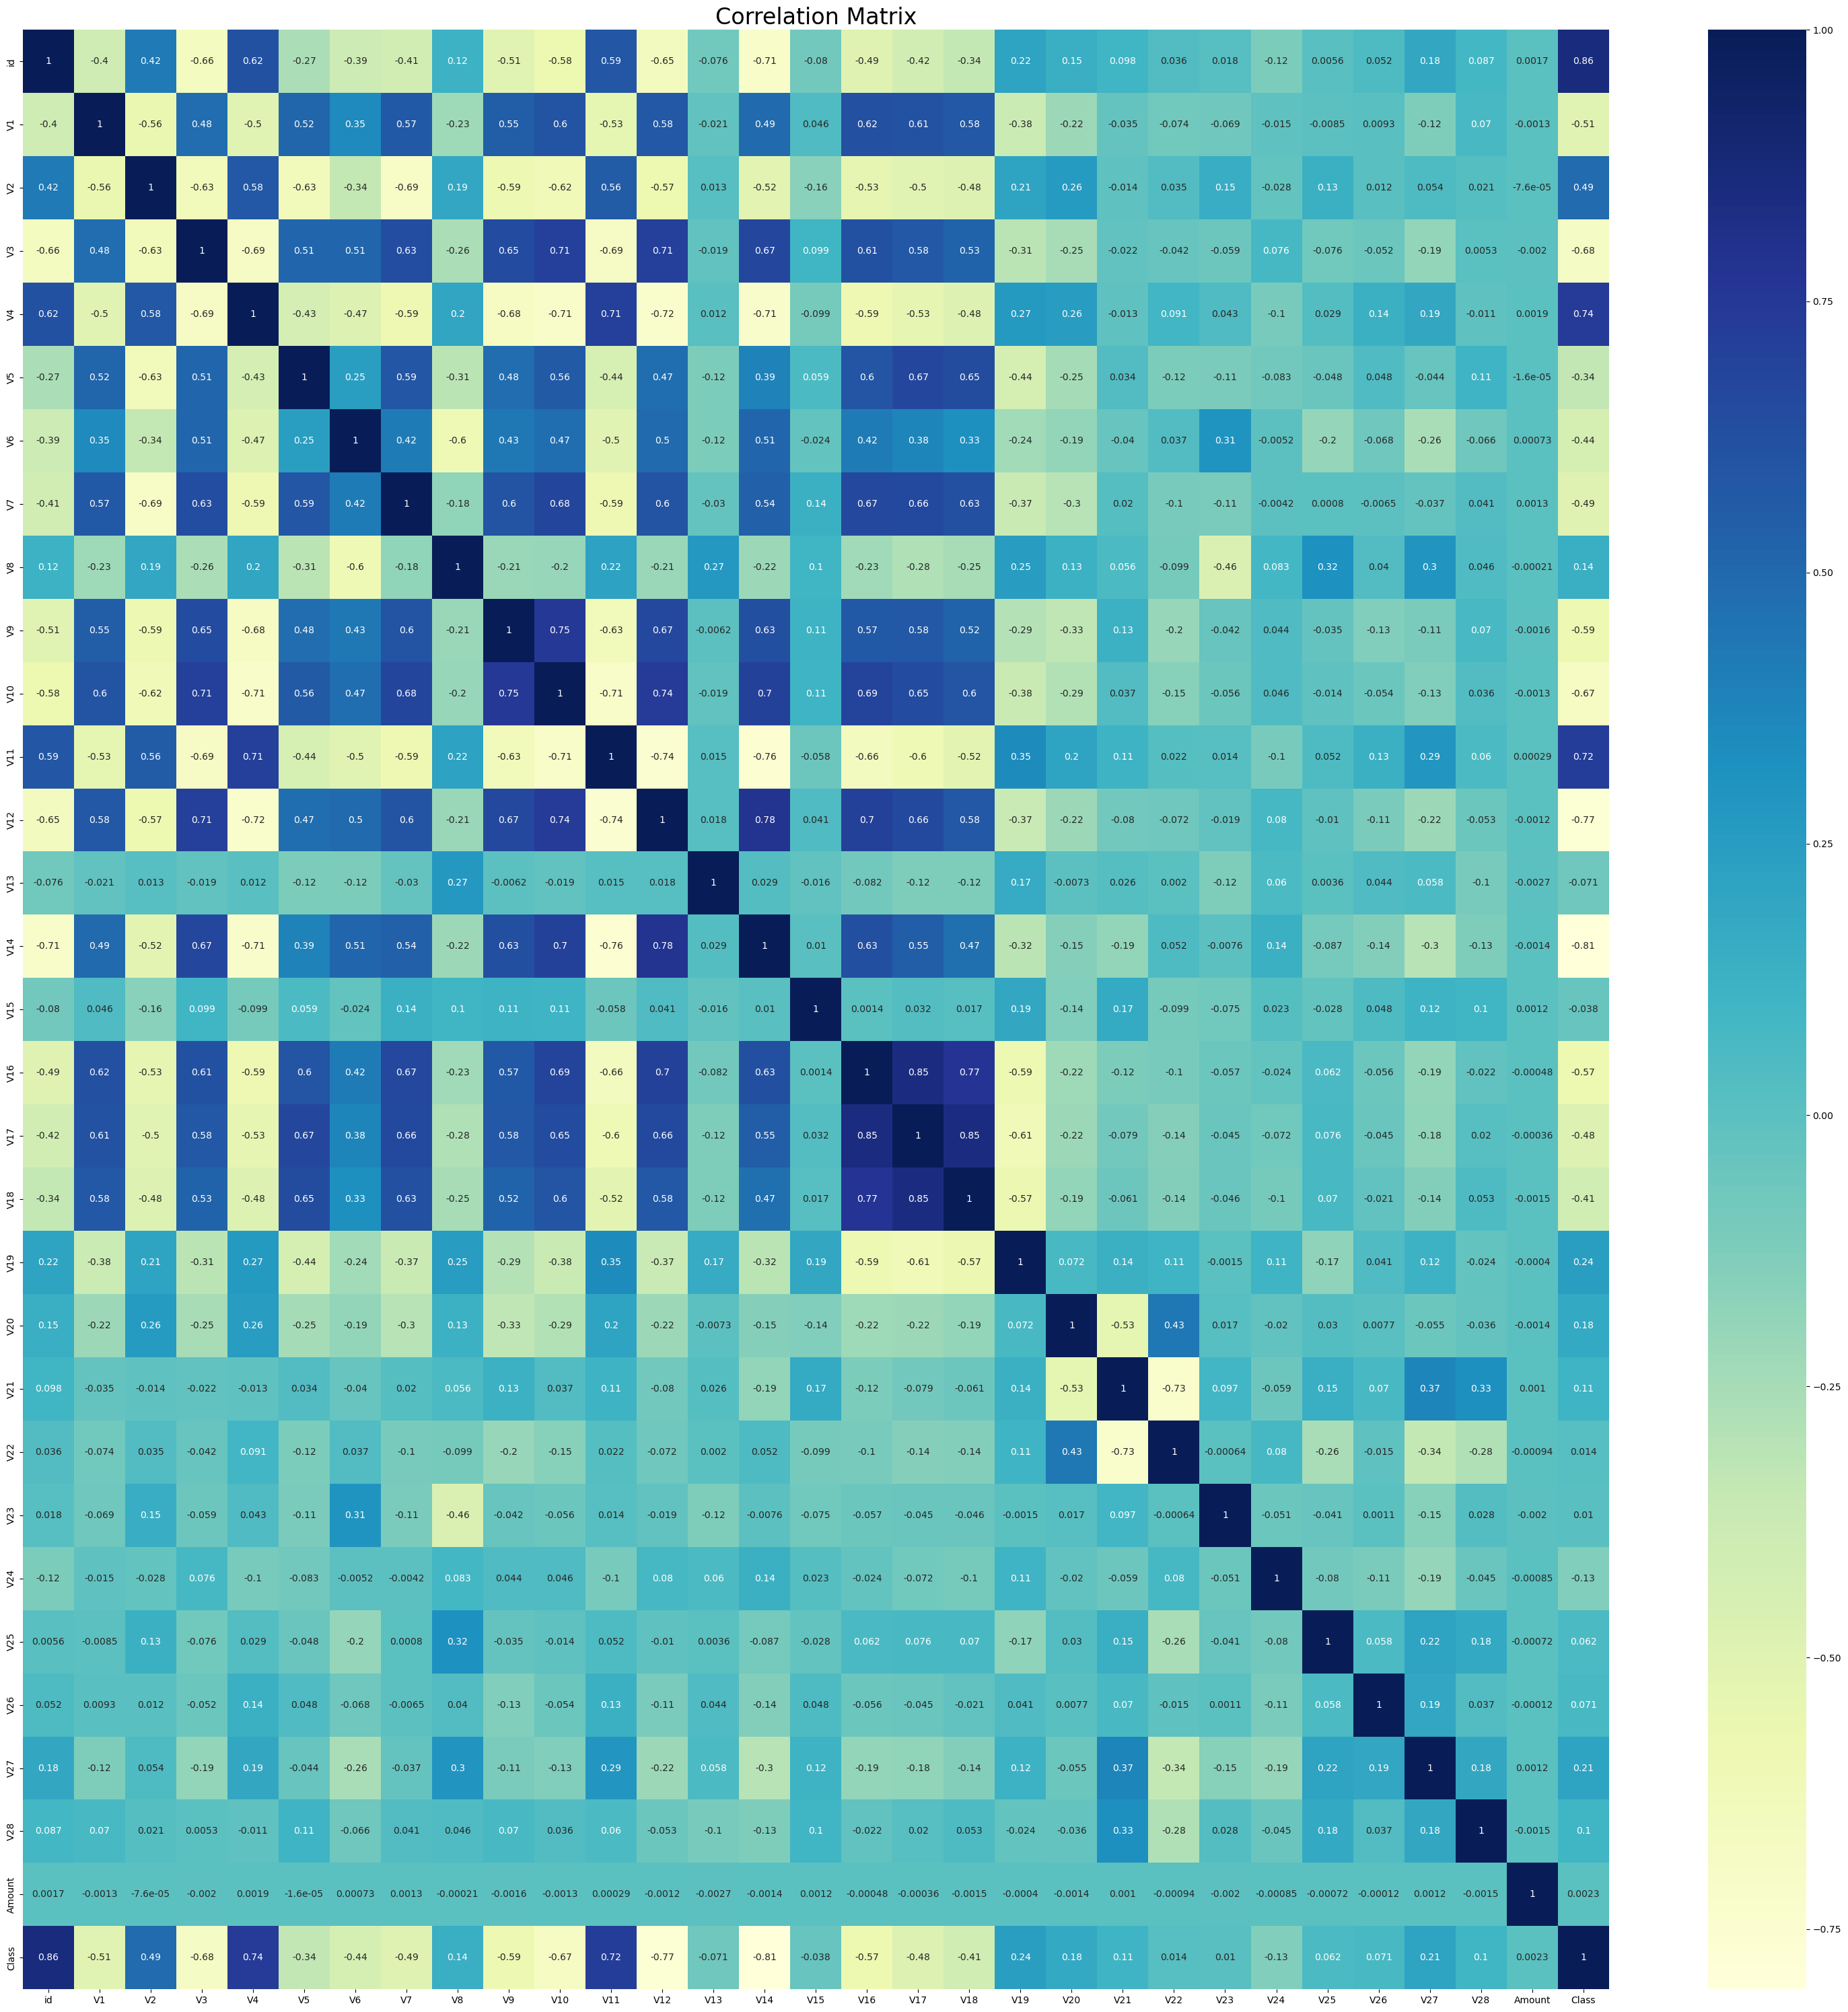

In [134]:
numeric_data = df_tr.select_dtypes(include='number') # Selecting numeric columns

corr_matrix = numeric_data.corr() # Calculating the correlation matrix

# Creating a correlation matrix heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix', fontsize=24)
plt.tight_layout()
plt.show()

## Building a model

In [141]:
# Splitting data into training and test sets
X_T = df_tr.drop('Class', axis=1)
y_T = df_tr['Class']

X_train, X_test, y_train, y_test = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

PrintColor(f"Training set shape - X: {X_train.shape}, y: {y_train.shape}")
PrintColor(f"Testing set shape - X: {X_test.shape}, y: {y_test.shape}")

Training set shape - X: (511767, 29), y: (511767,)
Testing set shape - X: (56863, 29), y: (56863,)


In [143]:
# Initlizing Models

# XGB Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42) 

# CatBoost Classifier
catboost = CatBoostClassifier(iterations=100, random_state=42 , verbose = 0) 

# LightGBM Classifier
lgb_params = {
 'n_estimators': 890,
 'learning_rate': 0.7019434172842792,
 'max_depth': 19,
 'reg_alpha': 1.2057738033316066,
 'reg_lambda': 0.18598174484559382,
 'num_leaves': 3,
 'subsample': 0.746154395882518,
 'colsample_bytree': 0.3877680559022922
}
lgbm = LGBMClassifier(**lgb_params, random_state=42 , verbose = -1)

print_boxed_green_heading('Base Classifiers Are Intilized')


| Base Classifiers Are Intilized |


In [150]:
# Fitting Each Model One by One 

# XGB Classifier
xgb.fit(X_train, y_train)
# Predictions
xgb_preds = xgb.predict(X_test)

# 2. CatBoost Classifier
catboost.fit(X_train, y_train)
# Predictions
catboost_preds = catboost.predict(X_test)

# 3. LightGBM Classifier
lgbm.fit(X_train, y_train)
# Predictions
lgbm_preds = lgbm.predict(X_test)
#-----------------------------
print_boxed_green_heading('Models Are Fitted')


| Models Are Fitted |


### Models' evaluation
I am going to evaluate the models against the following criterias:
1. Accuracy
2. Precision
3. 
Confusion Matrix

In [146]:
# Creating an evaluation fuction
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, confusion

In [151]:
# XGB Classifier
accuracy_XGB, precision_XGB, confusion_XGB = evaluate(y_test, xgb_preds)
print_boxed_green_heading("Evaluation Results for XGB Classifier")

PrintColor(f"The Accuracy Score Of XGB Classifier is {accuracy_XGB}, Precision Is {precision_XGB},\nConfusion Matrix is \n{confusion_XGB} ")
print("\n")

# CatBoost Classifier
accuracy_Cat, precision_Cat, confusion_Cat = evaluate(y_test, catboost_preds)
print_boxed_green_heading("Evaluation Results for CatBoost Classifier")
PrintColor(f"The Accuracy Score Of CatBoost Classifier is {accuracy_Cat}, Precision Is {precision_Cat},\nConfusion Matrix is \n{confusion_Cat} ")
print("\n")

# LightGBM Classifier
accuracy_LGBM, precision_LGBM, confusion_LGBM = evaluate(y_test, lgbm_preds)
print_boxed_green_heading("Evaluation Results for LightBoost Classifier")
PrintColor(f"The Accuracy Score Of CatBoost Classifier is {accuracy_LGBM}, Precision Is {precision_LGBM},\nConfusion Matrix is \n{confusion_Cat} ")
print("\n")


| Evaluation Results for XGB Classifier |
The Accuracy Score Of XGB Classifier is 0.9997889664632538, Precision Is 0.9995771074147166,
Confusion Matrix is 
[[28487    12]
 [    0 28364]] 



| Evaluation Results for CatBoost Classifier |
The Accuracy Score Of CatBoost Classifier is 0.9993493132616992, Precision Is 0.9986972289708109,
Confusion Matrix is 
[[28462    37]
 [    0 28364]] 



| Evaluation Results for LightBoost Classifier |
The Accuracy Score Of CatBoost Classifier is 0.9995427606703832, Precision Is 0.9990841845720324,
Confusion Matrix is 
[[28462    37]
 [    0 28364]] 




In [152]:
## Storing and Visualizing the Results
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [accuracy_XGB, accuracy_LGBM, accuracy_Cat],
    'Precision': [precision_XGB, precision_LGBM, precision_Cat]
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted dataframe
evaluation_df

,Model,Accuracy,Precision
0,XGBoost,0.999789,0.999577
1,LightGBM,0.999543,0.999084
2,CatBoost,0.999349,0.998697


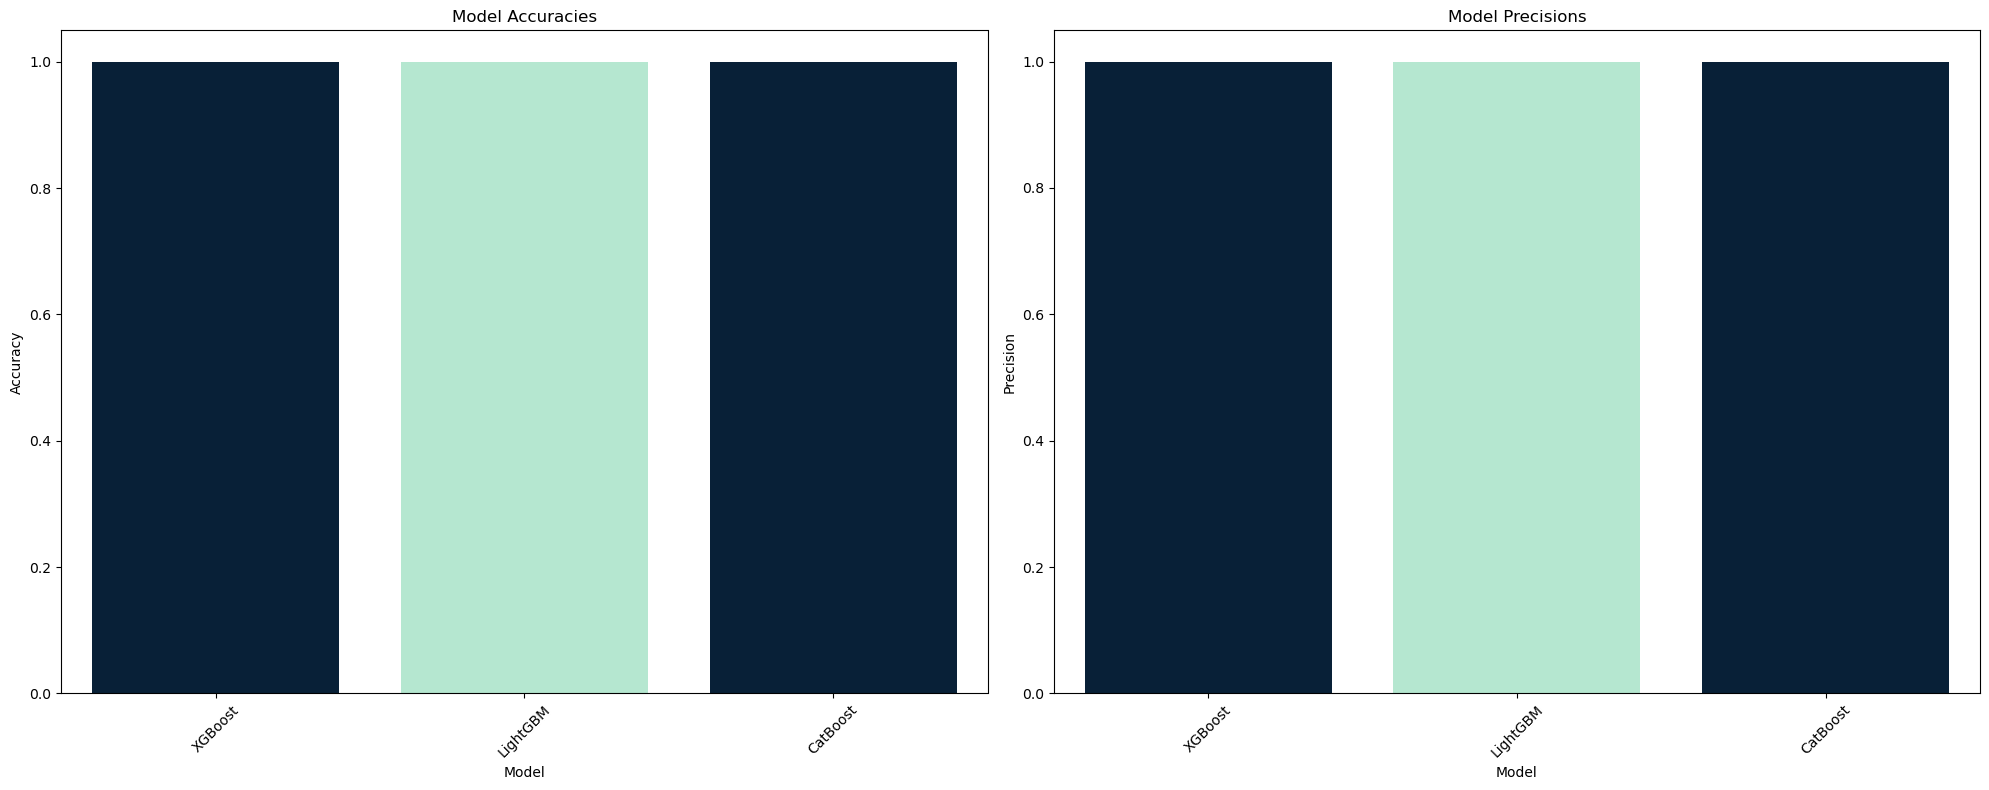

In [153]:
models = ['XGBoost', 'LightGBM', 'CatBoost']
accuracies = [accuracy_XGB, accuracy_LGBM, accuracy_Cat]
precisions = [precision_XGB, precision_LGBM, precision_Cat]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracies, 'Precision': precisions}
df = pd.DataFrame(data)

# Define custom color palette
custom_palette = sns.color_palette("Paired")

# Plot using Seaborn
plt.figure(figsize=(20, 8))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette=palette[0:2])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Subplot 2: Precision
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Precision', data=df, palette=palette[0:2])
plt.title('Model Precisions')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()